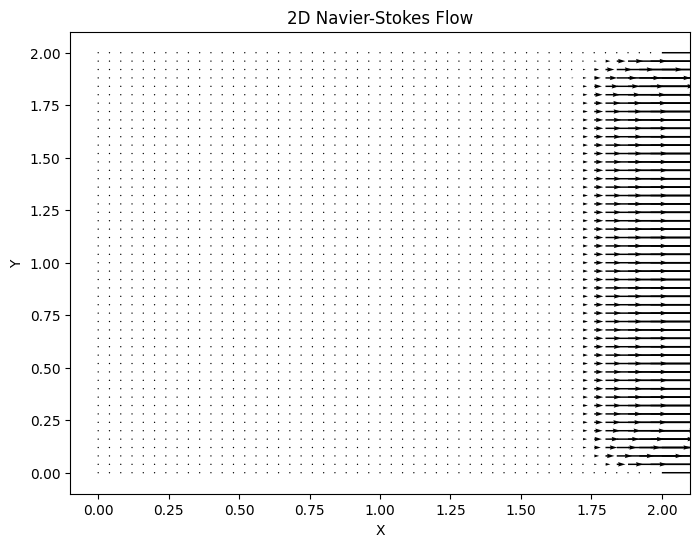

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
nx = 51  # Number of grid points in x-direction
ny = 51  # Number of grid points in y-direction
nt = 100  # Number of time steps
dt = 0.001  # Time step size
nu = 0.1  # Viscosity

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.zeros((ny, nx))  # x-velocity component
v = np.zeros((ny, nx))  # y-velocity component
p = np.zeros((ny, nx))  # Pressure field
b = np.zeros((ny, nx))  # Source term for pressure calculation

# Solver function
def solve_flow(u, v, p, b, nt, dt, dx, dy, nu):
    for n in range(nt):
        un = u.copy()
        vn = v.copy()

        # Solve for u and v
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * (un[1:-1, 1:-1] - un[0:-2, 1:-1]) +
                         nu * dt / dx**2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         nu * dt / dy**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) +
                         dt * b[1:-1, 1:-1])

        v[1:-1, 1:-1] = (vn[1:-1, 1:-1] -
                         un[1:-1, 1:-1] * dt / dx * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) +
                         nu * dt / dx**2 * (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                         nu * dt / dy**2 * (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) +
                         dt * b[1:-1, 1:-1])

        # Solve for pressure
        p[1:-1, 1:-1] = ((p[1:-1, 2:] + p[1:-1, 0:-2]) * dy**2 +
                         (p[2:, 1:-1] + p[0:-2, 1:-1]) * dx**2) / \
                        (2 * (dx**2 + dy**2)) - \
                        dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * \
                        ((1 / dx) * (u[1:-1, 2:] - u[1:-1, 0:-2]) +
                         (1 / dy) * (v[2:, 1:-1] - v[0:-2, 1:-1]))

        # Boundary conditions
        u[0, :] = 0
        u[-1, :] = 0
        u[:, 0] = 0
        u[:, -1] = 1  # Velocity boundary condition on right edge
        v[0, :] = 0
        v[-1, :] = 0
        v[:, 0] = 0
        v[:, -1] = 0

    return u, v, p

# Solve the flow
u, v, p = solve_flow(u, v, p, b, nt, dt, dx, dy, nu)

# Plot the results
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, u, v)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Navier-Stokes Flow')
plt.show()